## [샘플 데이터셋 만들기]

- 종목 : BTC-KRW(업비트), BTC/USDT(바이낸스)
- 데이터 : 4시간봉(pyupbit 기준 'minute240')
- 데이터 수 : count=300 (4시간봉이므로 50일 데이터)

- 이미지 변환 (양봉/음봉 구분은 부차적)
- 이미지 변환 및 저장, 로드 타임스탬프 확인

In [100]:
!pip install pyupbit
! pip install mpl_finance
import pyupbit
import numpy as np
import matplotlib.pyplot as plt
import time
import mpl_finance

In [131]:
upbit_df = pyupbit.get_ohlcv("KRW-BTC", interval="minute240", count=300)     # 4시간봉 데이터
upbit_df
## 시가(open), 고가(high), 저가(low), 종가(close), 거래량(volume)

### 큰 데이터셋에서 인덱싱해서 그림 그리기 vs 작은 데이터셋을 계속 불러와서 그림 그리기
### 큰 데이터셋에서 인덱싱해서 그림 그리는게 나을듯?? 
# 4시간봉을 하루에 6개, 일주일에 42개봉, 50일에 300개봉

,open,high,low,close,volume,value
2022-03-23 21:00:00,51425000.0,51988000.0,51268000.0,51865000.0,1171.324756,6.047619e+10
2022-03-24 01:00:00,51858000.0,51998000.0,51354000.0,51539000.0,441.956334,2.283363e+10
2022-03-24 05:00:00,51539000.0,52232000.0,51500000.0,52138000.0,594.896208,3.084105e+10
2022-03-24 09:00:00,52138000.0,52511000.0,51800000.0,52013000.0,1771.530262,9.238201e+10
2022-03-24 13:00:00,52010000.0,52627000.0,52000000.0,52393000.0,1250.068825,6.537671e+10
...,...,...,...,...,...,...
2022-05-12 01:00:00,41720000.0,41874000.0,40379000.0,40383000.0,2859.366893,1.173701e+11
2022-05-12 05:00:00,40383000.0,40642000.0,39088000.0,40290000.0,3475.102918,1.384524e+11
2022-05-12 09:00:00,40263000.0,41178000.0,39000000.0,39095000.0,4660.773771,1.867482e+11
2022-05-12 13:00:00,39095000.0,39120000.0,37000000.0,38690000.0,6158.000045,2.347481e+11


### 양/음봉 나누고 x축 날짜가 아닌 정수 나오게 하는 경우
#### 50일을 한페이지에 볼 경우 202개 이미지 데이터밖에 나오지 않음 (총 4시간봉 데이터는 10132개)
#### 4시간 봉 30일치를 한 페이지에 보겠다=337개 이미지 데이터
#### 일주일치를 볼 경우, 1447개 데이터

time : 0.0981299877166748


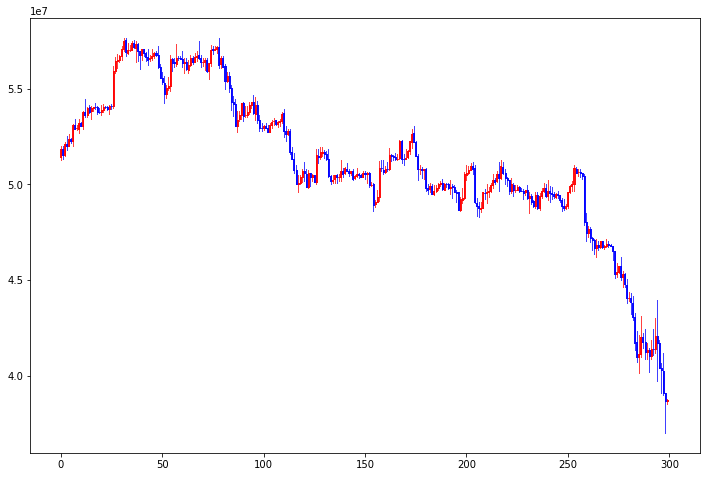

In [132]:
start = time.time()  # 시작 시간 저장

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
mpl_finance.candlestick2_ohlc(ax, upbit_df['open'], upbit_df['high'], upbit_df['low'], upbit_df['close'],
                              width=0.5, colorup='r', colordown='b')
plt.savefig("C:/Users/Sweet/Desktop/2022 컨퍼/upbit_image1.png")
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

## 한달치 데이터 이미지에 나타내기

time : 0.09563851356506348


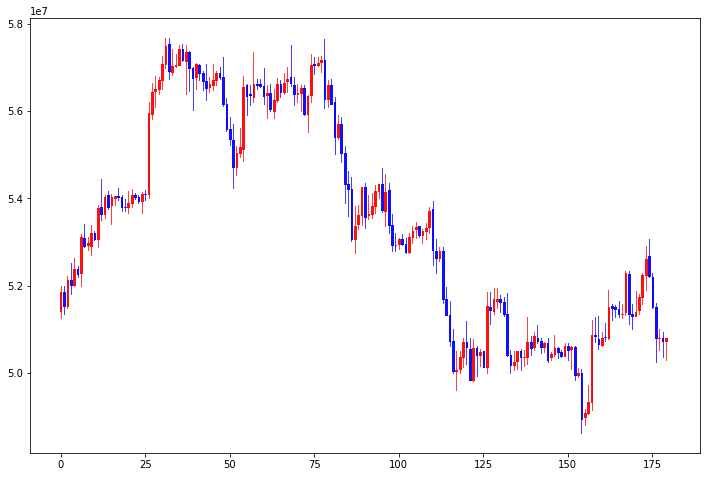

In [133]:
start = time.time()  # 시작 시간 저장

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
mpl_finance.candlestick2_ohlc(ax, upbit_df.iloc[:180,0], upbit_df.iloc[:180,1], upbit_df.iloc[:180,2], upbit_df.iloc[:180,3],
                              width=0.5, colorup='r', colordown='b')
plt.savefig("C:/Users/Sweet/Desktop/2022 컨퍼/upbit_image1.png")
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

## 보름치 데이터 이미지에 나타내기

time : 0.10146760940551758


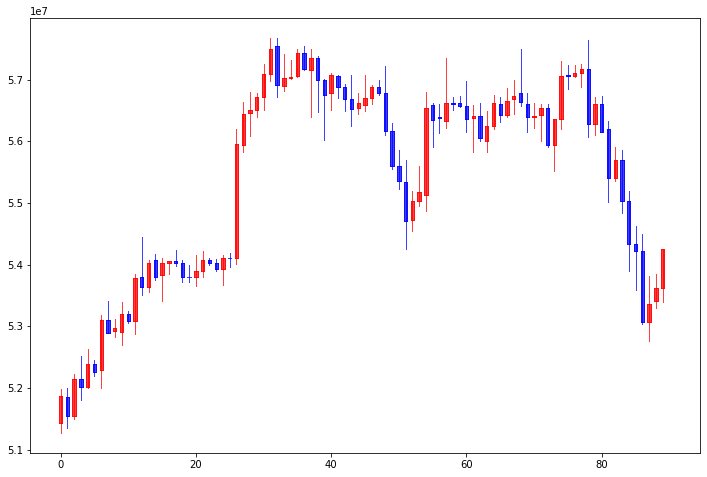

In [135]:
start = time.time()  # 시작 시간 저장

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
mpl_finance.candlestick2_ohlc(ax, upbit_df.iloc[:90,0], upbit_df.iloc[:90,1], upbit_df.iloc[:90,2], upbit_df.iloc[:90,3],
                              width=0.5, colorup='r', colordown='b')
plt.savefig("C:/Users/Sweet/Desktop/2022 컨퍼/upbit_image1.png")
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

## 일주일치 데이터 이미지에 나타내기

time : 0.08678245544433594


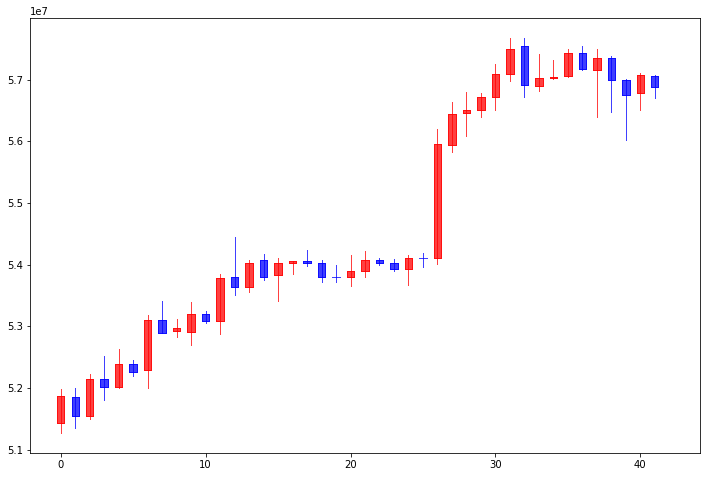

In [134]:
start = time.time()  # 시작 시간 저장

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
mpl_finance.candlestick2_ohlc(ax, upbit_df.iloc[:42,0], upbit_df.iloc[:42,1], upbit_df.iloc[:42,2], upbit_df.iloc[:42,3],
                              width=0.5, colorup='r', colordown='b')
plt.savefig("C:/Users/Sweet/Desktop/2022 컨퍼/upbit_image1.png")
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

## 양음봉 색 지정 없이 데이터 저장

time : 0.09400057792663574


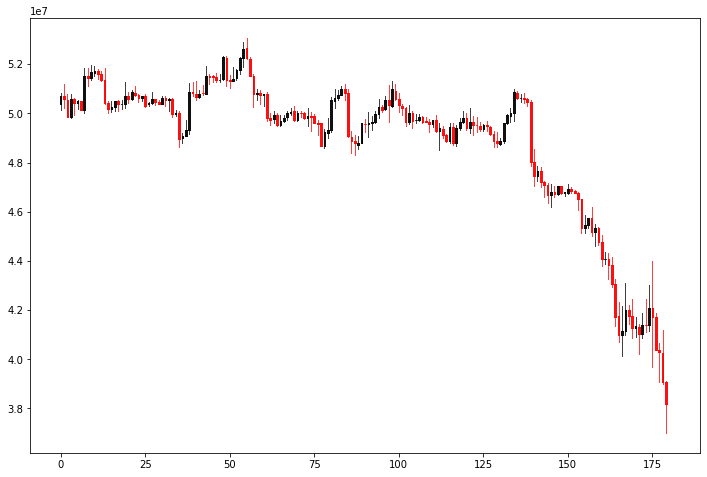

In [119]:
start = time.time()  # 시작 시간 저장

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
mpl_finance.candlestick2_ohlc(ax, upbit_df['open'], upbit_df['high'], upbit_df['low'], upbit_df['close'],
                              width=0.5)
plt.savefig("C:/Users/Sweet/Desktop/2022 컨퍼/upbit_image1.png")
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

In [122]:
# 후자의 경우 , 300개 데이터 구축해서 저장하는 데 약 27초밖에 안걸림
(0.09*300)

27.0

- 토의해봐야 할 부분
1. 4시간봉 데이터가 10132개밖에 없다. 처음 시작이 2017년 9월달부터임
2. 분봉 등과 함께 학습을 진행해야 할 것 같은데 하나의 이미지 안에 몇일치를 보일 것인가?
3. 4시간봉으로 학습할 경우, 알림이 가는 데까지 최소한 4시간을 기다려야 의미있는 알림이 가는 것 아닌지? 그러면 해당 웹서빙이 의미가 있나? 앱도 아닌데 사용할 사람이 있을까..? 적어도 사람들이 컨퍼 이후에 웹으로 들어가서 오 이렇게 했구나 정도는 알아야 되는 것 아닌지?